# Lab 5 | EDA & Visualization

In [1]:
import pandas as pd
df = pd.read_csv("../data/students.csv")

In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64

The GPA column has the most missing values. This might be because if this data was collected through a survey, students with lower GPAs may feel embarassed about giving away their low GPAs and not fill out that section.

In [3]:
df['age']
stats = {
    'count':   [df[i].count() for i in ['age','gpa']],
    'mean':    [df[i].mean() for i in ['age','gpa']],
    'median':  [df[i].median() for i in ['age','gpa']],
    'variance':[df[i].var() for i in ['age','gpa']],
    'std dev': [df[i].std() for i in ['age','gpa']],
    'min':     [df[i].min() for i in ['age','gpa']],
    'max':     [df[i].max() for i in ['age','gpa']],
}
summary = pd.DataFrame(stats)
print(summary)

   count       mean  median  variance   std dev    min    max
0    100  16.130000  16.000  1.892020  1.375507  14.00  18.00
1     90   2.624667   2.665  0.227432  0.476898   1.63   3.93


<Axes: >

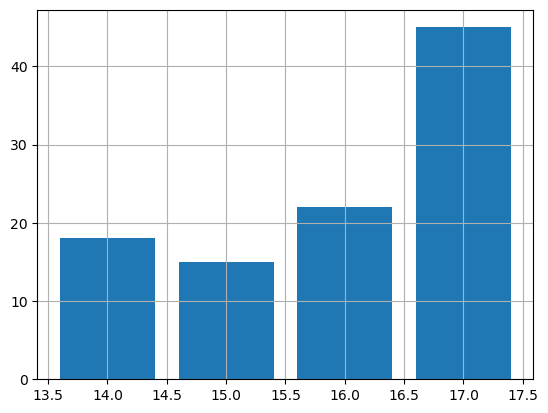

In [4]:


df['age'].hist(bins=range(14,19),align='left',rwidth=0.8)


<Axes: xlabel='gpa', ylabel='Count'>

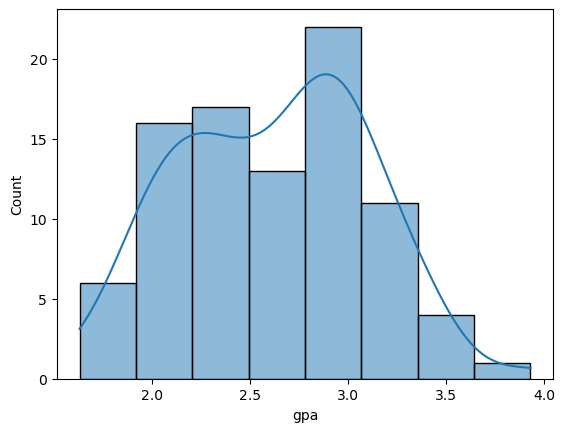

In [5]:
import seaborn as sns
sns.histplot(df["gpa"], kde=True)

Histogram of age: The age distribution is skewed to the left, which indicates that the distribution was skewed toward older students.

Histogram of GPA: The GPA distribution appears to be slightly bimodal, with one peak around 2.3-2.4 and another around 2.9-3.0. 

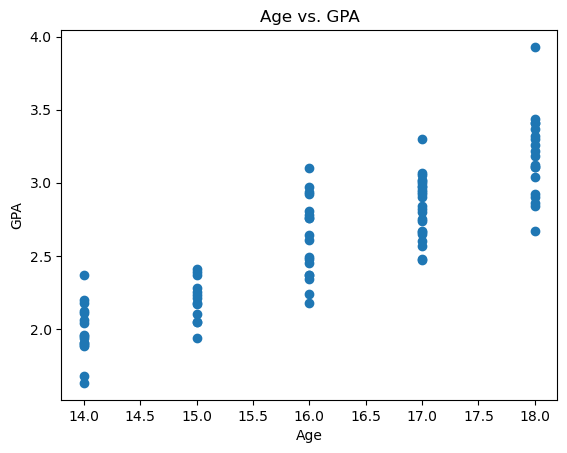

np.float64(0.8786075344584666)

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['gpa'])
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('Age vs. GPA')
plt.show()

df["age"].corr(df["gpa"])

Interpret: GPA trends up with age in this dataset. The correlation value for GPA vs age is 0.879, which is close to 1, indicating a strong linear relationship with a positive association. Also, GPA visually goes up with age on the graph and there don't appear to be many outliers that could significantly affect the results.

In [7]:
import numpy as np
df["major"]=df["major"].str.lower()
df["major"]=df["major"].str.strip()
df["major"]=df["major"].replace('', np.nan)
df.dropna(subset=['major'], inplace=True)
df.tail(10)

,student_id,age,gpa,gender,major,year
89,90,18,3.41,F,music,senior
91,92,18,3.93,M,chemistry,senior
92,93,18,3.30,F,english,senior
93,94,15,2.05,F,economics,sophomore
94,95,18,2.67,F,history,senior
95,96,15,2.37,M,art,sophomore
96,97,15,2.10,M,art,sophomore
97,98,17,2.80,F,computer science,senior
98,99,17,2.75,F,computer scien,senior
99,100,14,1.96,M,biology,freshman


In [8]:
df.to_csv("../data/students_clean.csv", index=False)

Conclusion: There is a strong positive association between GPA and age for this survey. The age distribution is skewed to the left, and the GPA distribution appears to be bimodal.